In [9]:
#!/usr/bin/env python
#-*- coding: utf-8 -*-
'''
    python ==> 비주얼컴퓨팅,
'''
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import scipy.misc
import scipy.io
import random
import cv2
from PIL import Image
import math
import os

In [2]:

#-----------------------------------------------------------------
# train_original
# pos_neg_train 데이터를 불러오기 위한 데이터 전처리 코드

pos_path = 'D:\\edward\\visualComputing_humanDetection\\pos\\pos_train\\'

neg_path = 'D:\\edward\\visualComputing_humanDetection\\neg\\neg_train\\'

pos_fnames = os.listdir(pos_path)
neg_fnames = os.listdir(neg_path)


# 데이터 파일들의 이름을 데이터 처리하기 쉽게 변경한다
cnt = 0
for fname in pos_fnames:
    os.rename(pos_path + fname, pos_path + 'pos_train_' + str(cnt) +'.png')
    cnt += 1

# neg 이미지들의 사이즈를 70 x 134으로 수정한다
cnt = 1
for _ in range(0, 500):
    img = Image.open(neg_path + 'Image'+str(cnt) +'.bmp') # image extension *.png,*.jpg
    new_width  = 70
    new_height = 134
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    img.save(neg_path + 'Image' + str(cnt) + '.bmp') # format may what u want ,*.png,*jpg,*.gif
    cnt += 1






FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'D:\\edward\\visualComputing_humanDetection\\pos\\pos_train\\pos_train_10.png' -> 'D:\\edward\\visualComputing_humanDetection\\pos\\pos_train\\pos_train_2.png'

In [ ]:
# neg 이미지들의 사이즈를 70 x 134으로 수정한다
cnt = 1
for _ in range(0, 500):
    img = Image.open(neg_path + 'Image'+str(cnt) +'.bmp') # image extension *.png,*.jpg
    new_width  = 70
    new_height = 134
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    img.save(neg_path + 'Image' + str(cnt) + '.bmp') # format may what u want ,*.png,*jpg,*.gif
    cnt += 1


In [3]:

#-----------------------------------------------------------------
# test_original
# pos_neg_test 데이터를 불러오기 위한 데이터 전처리 코드

pos_path2 = 'D:\\edward\\visualComputing_humanDetection\\pos\\pos_test\\'
neg_path2 = 'D:\\edward\\visualComputing_humanDetection\\neg\\neg_test\\'

pos_fnames2 = os.listdir(pos_path2)
neg_fnames2 = os.listdir(neg_path2)


# 데이터 파일들의 이름을 데이터 처리하기 쉽게 변경한다
cnt = 0
for fname in pos_fnames2:
    os.rename(pos_path2 + fname, pos_path2 + 'pos_test_' + str(cnt) +'.png')
    cnt += 1

# neg 이미지들의 사이즈를 70 x 134으로 수정한다
# Image533.bmp 파일이 없어서 534파일을 하나 복사해서 사용했다
cnt = 501
for _ in range(0, 100):
    img = Image.open(neg_path2 + 'Image'+str(cnt) +'.bmp') # image extension *.png,*.jpg
    new_width  = 70
    new_height = 134
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    img.save(neg_path2 + 'Image' + str(cnt) + '.bmp') # format may what u want ,*.png,*jpg,*.gi
    cnt += 1
    
img = Image.open(neg_path2 + 'Image600.bmp') # image extension *.png,*.jpg
img = img.resize((new_width, new_height), Image.ANTIALIAS)
img.save(neg_path2 + 'Image600.bmp')


FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'D:\\edward\\visualComputing_humanDetection\\pos\\pos_test\\pos_test_10.png' -> 'D:\\edward\\visualComputing_humanDetection\\pos\\pos_test\\pos_test_2.png'

In [11]:





#----------------------------------------------------------
# train_original
# pos 700장 + neg 500장 이미지를 train_images에 저장하고 
# train_label를 1,1,1,1,1,......0,0,0,0,0 으로 저장한다

train_images = []
train_images_hog = []
t_labels = []

# pos Image 데이터 700장을 불러온다 (grayscale)
for num in range(0,700):
    train_images.append(scipy.misc.imread(pos_path 
             + 'pos_train_'+ str(num)+'.png', flatten=True))

# neg Image 데이터 500장을 불러온다 (grayscale)
for num in range(1,501):
    train_images.append(scipy.misc.imread(neg_path + 'Image'+ str(num)+'.bmp', flatten=True))

# Image 데이터를 numpy 데이터로 수정한다
train_images = np.array(train_images)
# HOG Feature 작업을 위한 변수
train_images_hog = np.array(train_images)
train_images = train_images.reshape(1200, 9380, )


# Label 데이터는 1 * 700 , 0 * 500의 행벡터로 생성한다
t_labels = np.append(np.ones([1,700]) , np.zeros([1,500]))

# train Label 데이터를 [1 x 100] 의 행렬로 표현한다
#           예를 들어 3이면 [0,0,1,0,.....,0] 과 같이 설정한다
train_labels  = np.array(np.zeros(2400).reshape(1200,2))
for num in range(0,1200):
    train_labels[num][int(t_labels[num]) - 1] = 1





#----------------------------------------------------------
# test_original
# pos 192장 + neg 100장 이미지를 train_images에 저장하고 
# train_label를 1,1,1,1,1,......0,0,0,0,0 으로 저장한다

test_images = []
te_labels = []

# pos Image 데이터 192장을 불러온다 (grayscale)
for num in range(0,192):
    test_images.append(scipy.misc.imread(pos_path2 + 'pos_test_'+ str(num)+'.png', flatten=True))

# neg Image 데이터 500장을 불러온다 (grayscale)
for num in range(501,601):
    test_images.append(scipy.misc.imread(neg_path2 + 'Image'+ str(num)+'.bmp', flatten=True))

# Image 데이터를 numpy 데이터로 수정한다
test_images = np.array(test_images)
# HOG Feature 작업을 위한 변수
test_images_hog = np.array(test_images)
test_images = test_images.reshape(292, 9380, )

# Label 데이터는 1 * 700 , 0 * 500의 행벡터로 생성한다
te_labels = np.append(np.ones([1,192]) , np.zeros([1,100]))


# train Label 데이터를 [1 x 100] 의 행렬로 표현한다
#           예를 들어 3이면 [0,0,1,0,.....,0] 과 같이 설정한다
test_labels  = np.array(np.zeros(584).reshape(292,2))
for num in range(0,292):
    test_labels[num][int(te_labels[num]) - 1] = 1




# train, test 이미지 데이터를 0 ~ 1 사이 값으로 정규화합니다
train_images = train_images / 255.
train_images_hog = train_images_hog / 255.
test_images = test_images / 255.
test_images_hog = test_images_hog / 255.



In [12]:

#-----------------------------------------------------------------
_num_examples = 1200   # 데이터 갯수
_index_in_epoch = 0   # epoch
_images = train_images  # Image 변수 
_labels = train_labels  # Label 변수
_epochs_completed = 0   

# batch 연산을 수행하는 함수
# 호출될 때마다 랜덤으로 batch_size의 (Image, Label) 데이터를 반환한다
def next_batch(batch_size):
    """Return the next `batch_size` examples from this data set."""
    global _index_in_epoch
    global _images
    global _labels
    global _epochs_completed

    start = _index_in_epoch
    _index_in_epoch += batch_size

    if _index_in_epoch > _num_examples:
      # Finished epoch
      _epochs_completed += 1

      # Shuffle the data
      perm = np.arange(_num_examples)
      np.random.shuffle(perm)
      _images = _images[perm]
      _labels = _labels[perm]

      # Start next epoch
      start = 0
      _index_in_epoch = batch_size
      assert batch_size <= _num_examples

    end = _index_in_epoch
    return _images[start:end], _labels[start:end]


# 가중치를 초기화하는 함수 (정규분포 stddev=0.1로 초기화한다)
def weight_variable(shape):
	initial = tf.truncated_normal(shape, stddev=0.1)
	return tf.Variable(initial)


# 바이어스를 초기화하는 함수 (0.1로 초기화한다)
def bias_variable(shape):
	initial = tf.constant(0.1, shape=shape)
	return tf.Variable(initial)


# 컨벌루션을 실행하는 함수
# padding = 'SAME' 입력과 출력의 이미지 크기가 같도록 해준다
# (28,28) --> (28,28)
# padding = 'VALID' 필터의 크기만큼 이미지 크기가 감소한다
def conv2d_valid(x, W):
	return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='VALID')


def conv2d_same(x, W):
	return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')


# max pooling을 실행하는 함수
def max_pool_2x2(x):
	return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')




In [13]:

#-----------------------------------------------------------------
# Tensorflow 코드
#-----------------------------------------------------------------

x = tf.placeholder("float32", [None, 9380]) # mnist data image of shape 134 x 70
y = tf.placeholder("float32", [None, 2]) 

W = tf.Variable(tf.zeros([9380,2]))
b = tf.Variable(tf.zeros([2]))


# 1st conv layer ----------------------
W_conv1 = weight_variable([8,8,1,32])
b_conv1 = bias_variable([32])

# -1 : 아직 디멘젼이 결정되지 않았다
# 1 : 흑백이므로 1을 삽입한다. 칼라이면 3을 삽입한다
# x은 9380x1인데 134x70x1로 행렬을 다시 만들어준다
x_image = tf.reshape(x, [-1, 134, 70, 1])

# y = x*w + b에 ReLU를 적용한다
# (134, 70) ==> (134, 70)
h_conv1 = tf.nn.relu(conv2d_same(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
# (134, 70) ==> (67, 35)



# 2nd conv layer -----------------------
W_conv2 = weight_variable([4,4,32,64])
b_conv2 = bias_variable([64])

# (67, 35) ==> (64, 32)
h_conv2 = tf.nn.relu(conv2d_valid(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
# (64, 32) ==> (32, 16)



# 1st fully connected layer -----------------------
W_fc1 = weight_variable([32*16*64, 5000])
b_fc1 = bias_variable([5000])

h_pool2_flat = tf.reshape(h_pool2, [-1, 32*16*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
# 위 연산으로 1000x1의 벡터가 생성된다



# Dropout ------------------------
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)



# 2nd fully connected layer --------------
W_fc2 = weight_variable([5000, 2])
b_fc2 = bias_variable([2])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2


# learning_rate 잘 설정하는게 중요하다.. 0.1로 하니 전혀 변화가 없었다
learning_rate = 1e-3


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_conv))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


# 정답률을 계산한다  y_conv  vs  y
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))




In [14]:
#----------------------------------------------
batch_size = 50      # 한 루프에 몇개의 (Image, Label) 데이터를 학습하는지 설정
display_step = 100    # 루프를 돌면서 화면에 표시할 빈도 설정
saver = tf.train.Saver()
loopCount = 5000

for i in range(loopCount):
    costVal = 0.
    batch = next_batch(batch_size)
    # 20번 돌릴 때마다 결과를 확인한다
    if i % display_step == 0:
        train_accuracy = sess.run(accuracy,feed_dict={x:batch[0], y:batch[1], keep_prob:1.0})
        costVal = sess.run(cost, feed_dict={x: batch[0], y: batch[1], keep_prob:1.0})
    
        print('step', i , 'training_accuracy', train_accuracy,'cost', costVal)
        
        # 실제 학습과정 함수, dropout 50%를 토대로 학습한다
    sess.run(optimizer,feed_dict={x:batch[0],y:batch[1], keep_prob:0.5})
    if i == loopCount -1:
        saver.save(sess, "d:/edward/humanDetectionNoHOG2")
        print("[+] Done Save")






step 0 training_accuracy 0.94 cost 0.273218
step 100 training_accuracy 1.0 cost 0.060646
step 200 training_accuracy 1.0 cost 0.00541029
step 300 training_accuracy 1.0 cost 0.00331875
step 400 training_accuracy 1.0 cost 0.000720895
step 500 training_accuracy 1.0 cost 0.000202627
step 600 training_accuracy 1.0 cost 0.000164016
step 700 training_accuracy 1.0 cost 7.00079e-05
step 800 training_accuracy 1.0 cost 0.000121792
step 900 training_accuracy 1.0 cost 3.73136e-05
step 1000 training_accuracy 1.0 cost 1.28621e-05
step 1100 training_accuracy 1.0 cost 1.60923e-05
step 1200 training_accuracy 1.0 cost 1.3844e-05
step 1300 training_accuracy 1.0 cost 2.52063e-05
step 1400 training_accuracy 1.0 cost 1.42369e-05
step 1500 training_accuracy 1.0 cost 1.58035e-05
step 1600 training_accuracy 1.0 cost 3.82654e-06
step 1700 training_accuracy 1.0 cost 5.81204e-06
step 1800 training_accuracy 1.0 cost 1.07765e-06
step 1900 training_accuracy 1.0 cost 1.80716e-06
step 2000 training_accuracy 1.0 cost 1.0

KeyboardInterrupt: 

In [15]:
# 전부 학습이 끝나면 테스트 데이터를 넣어 정확도를 계산한다
test_accuracy = sess.run(accuracy,feed_dict={x: test_images, y: test_labels, keep_prob: 1.0})
print('test accuracy', test_accuracy)

test accuracy 0.914384


Label:  [0]
Prediction:  [1]


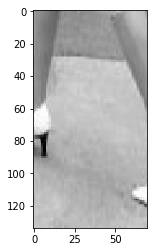

In [95]:

_num_examples_test = 292
#----------------------------------------------
# 임의의 사진 하나를 출력한 다음 맞혀보는 코드 
r = random.randint(0, _num_examples_test -1)
print ("Label: ", sess.run(tf.argmax(test_labels[r:r+1], 1)))
print ("Prediction: ", sess.run(tf.argmax(y_conv, 1), {x:test_images[r:r+1], keep_prob:1.0}))
plt.imshow(test_images[r:r+1].reshape(134, 70), cmap='gray', interpolation='nearest')
plt.show()





In [37]:
aa = sess.run(tf.argmax(y_conv, 1), {x:test_images[r:r+1], keep_prob:1.0})
print(aa[0])



1


In [38]:
orig_img = cv2.imread('./FudanPed00005.png', 0)
rows, cols = orig_img.shape

dic = {}  # 딕서녀리 생성
num_images = 0 # 전체 trim 된 이미지의 갯수

# 이미지 사이즈를 70x134로 리사이징하는 함수
def im_resize_to_orig(img):
    thumbnail = cv2.resize(img, (70, 134))
    return thumbnail


# 이미지를 자르는 함수
def im_trim(img, w, h, prefix, trim_prop):
    global num_images, dic
    iy, ix = img.shape
    xcnt = 0
    ycnt = 0

    # 이미지를 w x h 만큼 잘라서 하나하나씩 저장한다
    for y in range(0, iy, int(h*trim_prop)):
        ycnt += 1
        xcnt = 0
        for x in range(0, ix, int(w*trim_prop)):
            img_trim = img[y:y+h, x:x+w]
            
            # 이미지 크기가 70 x 134 보다 작으면 강제로 70x134로 리사이징 후 저장한다
            cols, rows = img_trim.shape
            if(cols < 134 or rows < 70):
                img_trim = im_resize_to_orig(img_trim)

            dic[num_images] = [prefix, xcnt, ycnt]  # 이미지 이름과 정보를 저장한다. keypoint!

            cv2.imwrite('./cropped_image_forVC/'+ str(num_images) + '.jpg', img_trim)
            xcnt += 1
            num_images += 1

    print("[*] Trim Done!")



# 이미지 크기를 줄이는 함수
def im_resize(img, prop):
    iy, ix = img.shape
    thumbnail = cv2.resize(img, (int(ix/prop), int(iy/prop)))
    newiy, newix = thumbnail.shape

    # 리사이징한 이미지 rows가 70보다 작으면 trim을 할 수 없으므로 skip한다
    if(newix < 70):
        return False

    print("orig : (", iy, ",", ix, ") ==> (", newiy, ",", newix ,")")

    cv2.imwrite('./resize_image_forVC/' + '_' + str(prop) +'.jpg', thumbnail)

    print("[*] Resize Done!")
    return True


# 이미저 전체 크기가 70x134보다 작으면 리사이징할 필요가 없으므로 아래 변수를 사용해 실제 리사이징된 이미지를 카운트한다
num_resize_img = 0

# 이미지를 리사이징한다. 두번째파라미터는 1/n
for i in range(2, 11):
    isOK = im_resize(orig_img, i)
    if isOK == True:
        num_resize_img += 1


img_1 = orig_img

# img_1, img_2 같은 변수를 loop 안에서 다루기 위해 namespace 변수를 추가한다
namespace = globals()
for i in range(2, num_resize_img+2):
    namespace['img_%d' % i] = cv2.imread('./resize_image_forVC/_'+str(i) +'.jpg',0)

# 이미지를 잘라서 저장한다
for i in range(1, num_resize_img+2):
    im_trim(namespace['img_%d' %i] , 70, 134, i, 0.25)


orig : ( 344 , 335 ) ==> ( 172 , 167 )
[*] Resize Done!
orig : ( 344 , 335 ) ==> ( 114 , 111 )
[*] Resize Done!
orig : ( 344 , 335 ) ==> ( 86 , 83 )
[*] Resize Done!
[*] Trim Done!
[*] Trim Done!
[*] Trim Done!
[*] Trim Done!


In [40]:
#-------------------------------------------------------------
# 결과적으로 trim된 이미지들을 불러온다
test_images = []

for num in range(0, num_images):
    test_images.append(scipy.misc.imread('./cropped_image_forVC/'+ str(num)+'.jpg', flatten=True))


# Image 데이터를 numpy 데이터로 수정한다
test_images = np.array(test_images)
test_images = test_images.reshape(num_images, 9380) # (70,134) ==> (9380,1)
test_images = test_images / 255.   # 데이터 정규화  0~1

In [121]:
#----------------------------------------------
orig_img = cv2.imread('./FudanPed00005.png', 0)

boxed_img = 0
for i in range(0, num_images):
    flag = sess.run(tf.argmax(y_conv, 1), {x:test_images[i:i+1], keep_prob:1.0})

    if flag[0] == 0:
        prop, xcnt, ycnt = dic[i]
    
        point_box = (int(prop*70*xcnt*0.25), int(prop*(ycnt-1)*134*0.25))
        
        end_x = point_box[0] + prop*70 
        end_y = point_box[1] +  prop*134

        if end_x > rows:
            end_x = rows
        if end_y > cols:
            end_y = cols

        end_box = (int(end_x), int(end_y))
        if prop ==3:
            cv2.rectangle(orig_img, point_box , end_box ,(0,255,0),3)

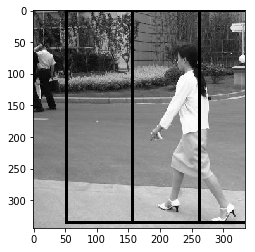

In [122]:
plt.imshow(orig_img,cmap='gray') ; plt.show()  #3

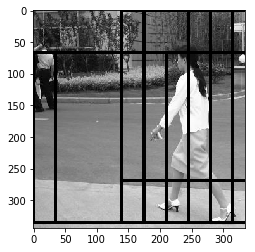

In [120]:
plt.imshow(orig_img,cmap='gray') ; plt.show()  #2

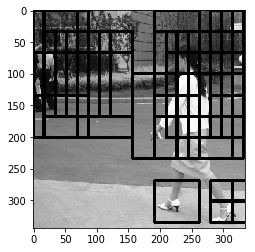

In [118]:
plt.imshow(orig_img,cmap='gray') ; plt.show()  #1

[1]


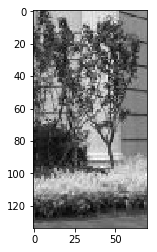

In [101]:
i=6
flag = sess.run(tf.argmax(y_conv, 1), {x:test_images[i:i+1], keep_prob:1.0})
print(flag)
plt.imshow(test_images[i].reshape(134,70),cmap='gray') ; plt.show()